In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.plotly as py
import plotly.tools as tls

In [6]:
cot_all = pd.read_excel("Data/cotizaciones_all.xlsx")
cot_all_plus = pd.read_excel("Data/Cotizaciones20181009.xlsx")
prod_all_plus = pd.read_excel("Data/Productos.xlsx")
neg_all = pd.read_excel("Data/negocios_all.xlsx")

In [3]:
py.sign_in(api_key='LFYL2kuLbBMQmvBzhdYy', username='japinoza')

In [7]:
cot_all.columns

Index(['ID', 'Fecha Cotizacion', 'Medio', 'Tipo de Medio', 'Proyecto', 'Etapa',
       'Productos', 'Presencial', 'Remoto', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'RUT', 'Nombre', 'Apellido 1', 'Apellido 2',
       'Nombre Completo', 'Telefono', 'Celular', 'Direccion', 'Region',
       'Provincia', 'Comuna', 'Correo Electronico', 'Sexo', 'Estado Civil',
       'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente', 'Razon Social',
       'Giro', 'Nacionalidad', 'N° Grupo Familiar', 'Actividad', 'Cargo',
       'Situacion Laboral', 'Empleador', 'Antiguedad Laboral', 'Profesión'],
      dtype='object')

In [9]:
neg_all.columns

Index(['ID', 'Fecha Cotizacion', 'ID Cotizacion', 'Medio', 'Tipo de Medio',
       'Proyecto', 'Etapa', 'Productos', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'Estado', 'Estado Comercial', 'Fecha Promesa',
       'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion',
       'Motivo Desis/Resc', 'Description Desis/Resc',
       'Resciliacion por Modificacion', 'RUT', 'Nombre', 'Apellido 1',
       'Apellido 2', 'Nombre Completo', 'Telefono', 'Celular', 'Direccion',
       'Region', 'Provincia', 'Comuna', 'Correo Electronico', 'Sexo',
       'Estado Civil', 'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente',
       'Razon Social', 'Giro', 'Nacionalidad', 'N° Grupo Familiar',
       'Actividad', 'Cargo', 'Situacion Laboral', 'Empleador',
       'Antiguedad Laboral', 'Profesión'],
      dtype='object')

In [114]:
x = cot_all['Total Productos'].dropna()
z = neg_all['Total Productos'].dropna()
y = neg_all[(neg_all['Estado'] == 'Escriturado') | (neg_all['Estado'] == 'Entregado')]['Total Productos'].dropna()

In [108]:
y.describe()

count      291.000000
mean      4955.870344
std       2953.431134
min       2896.000000
25%       3880.000000
50%       4200.000000
75%       4548.000000
max      21390.000000
Name: Total Productos, dtype: float64

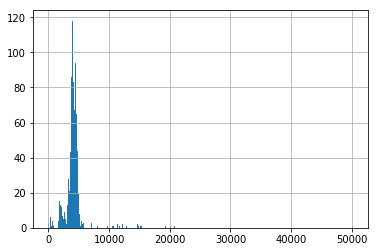

In [110]:
# x.hist(bins=100)
z.hist(bins=1000)
# y.hist(bins=100)


In [123]:
x = cot_all['Total Productos'].dropna()
z = neg_all['Total Productos'].dropna()
y = neg_all[(neg_all['Estado'] == 'Escriturado') | (neg_all['Estado'] == 'Entregado')]['Total Productos'].dropna()

data = []


trace = {
        "type": 'violin',
#         "x": 'Cotizaciones',
        "y": x,
        "name": 'Cotizaciones',
        "box": {
            "visible": True
        },
        "meanline": {
            "visible": True
        }
        }
data.append(trace)

trace = {
        "type": 'violin',
#         "x": 'Cotizaciones',
        "y": y,
        "name": 'Negocios',
        "box": {
            "visible": True
        },
        "meanline": {
            "visible": True
        }
        }
data.append(trace)

trace = {
        "type": 'violin',
#         "x": 'Cotizaciones',
        "y": y,
        "name": 'Ventas',
        "box": {
            "visible": True
        },
        "meanline": {
            "visible": True
        }
        }
data.append(trace)
fig = {
    "data": data,
    "layout" : {
        "title": "",
        "yaxis": {
            "zeroline": False,
        }
    }
}


py.iplot(fig, filename='multiple')

In [298]:
import copy
fechas = copy.deepcopy(neg_all)

In [299]:
fechas.columns

Index(['ID', 'Fecha Cotizacion', 'ID Cotizacion', 'Medio', 'Tipo de Medio',
       'Proyecto', 'Etapa', 'Productos', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'Estado', 'Estado Comercial', 'Fecha Promesa',
       'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion',
       'Motivo Desis/Resc', 'Description Desis/Resc',
       'Resciliacion por Modificacion', 'RUT', 'Nombre', 'Apellido 1',
       'Apellido 2', 'Nombre Completo', 'Telefono', 'Celular', 'Direccion',
       'Region', 'Provincia', 'Comuna', 'Correo Electronico', 'Sexo',
       'Estado Civil', 'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente',
       'Razon Social', 'Giro', 'Nacionalidad', 'N° Grupo Familiar',
       'Actividad', 'Cargo', 'Situacion Laboral', 'Empleador',
       'Antiguedad Laboral', 'Profesión'],
      dtype='object')

In [302]:
fechas.set_index(pd.to_datetime(fechas['Fecha Cotizacion']), inplace=True)
fechas= fechas.sort_values(by='Fecha Cotizacion')

In [304]:
neg_all['Estado'].unique()

array(['Anulada', 'Promesado', 'Reservado', 'Escriturado', 'Entregado'],
      dtype=object)

In [305]:
neg_all['Proyecto'].unique()

array(['Altos del Valle', 'Edificio Junge', 'Edificio Mil610',
       'San Andres Del Valle', 'Edificio Urban 1470'], dtype=object)

In [306]:
fechas.resample('A').sum()

,ID,ID Cotizacion,Total Productos,Descuentos,Valor Final Venta,Antiguedad Laboral
Fecha Cotizacion,,,,,,
2013-12-31,1254521,2100424,243055.82,1236.73,241819.09,220.0
2014-12-31,7092416,11138517,1070289.00,10959.37,1059405.03,617.0
2015-12-31,16520239,29586067,1804193.46,9709.36,1793802.10,1215.0
2016-12-31,13663691,30471626,1622798.40,33744.80,1588054.60,1105.0
2017-12-31,35593612,93296250,3613254.73,37224.51,3576030.22,1871.0
2018-12-31,16346017,48318115,1592188.32,12605.50,1579582.82,456.0


In [307]:
fechas

,ID,Fecha Cotizacion,ID Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Productos,Jefe Comercial,Ejecutivo Comercial,...,Razon Social,Giro,Nacionalidad,N° Grupo Familiar,Actividad,Cargo,Situacion Laboral,Empleador,Antiguedad Laboral,Profesión
Fecha Cotizacion,,,,,,,,,,,,,,,,,,,,,
2013-08-19 18:35:56.620,18294,2013-08-19 18:35:56.620,30718,INTERNET,Web Aitue,San Andres Del Valle,SADV - ET01 Condominio Azapa,5,Alejandra Pooley Flores,Angela Santis,...,NaN,NaN,Chilena,2,Profesional,NaN,Dependiente,NaN,0.0,Otro
2013-08-25 15:30:56.683,18304,2013-08-25 15:30:56.683,30726,RECONTACTO,Recontacto,San Andres Del Valle,SADV - ET01 Condominio Azapa,12,Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,NaN,Profesional,ADMINISTRADOR,Dependiente,MADERAS CAMPANARIO LTDA,6.0,Ingeniero Civil Industrial
2013-08-25 16:36:10.613,18305,2013-08-25 16:36:10.613,30727,INTERNET,Web Aitue,San Andres Del Valle,SADV - ET01 Condominio Azapa,11,Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,3,Profesional,Prevencionista,Dependiente,Sin empleador,2.0,Ingeniero en Prevención de Riesgo
2013-08-25 17:42:04.007,18306,2013-08-25 17:42:04.007,30728,INTERNET,Web Aitue,San Andres Del Valle,SADV - ET01 Condominio Azapa,13,Maribel Bastidas,Lilian Harrison,...,NaN,NaN,Chilena,Sin Información,Empleado,Empleado Publico,Dependiente,Fosis,7.0,Administrador Público
2013-08-25 17:50:31.397,18307,2013-08-25 17:50:31.397,30729,RECORRIDO POR EL SECTOR,Paseo,San Andres Del Valle,SADV - ET01 Condominio Azapa,15,Maribel Bastidas,Lilian Harrison,...,NaN,NaN,Chilena,3,Profesional,Super Intendente de Terminal,Dependiente,SVTI,13.0,Ingeniero
2013-08-25 18:10:19.890,18308,2013-08-25 18:10:19.890,30730,INTERNET,Web Aitue,San Andres Del Valle,SADV - ET01 Condominio Azapa,19,Maribel Bastidas,Lilian Harrison,...,NaN,NaN,Chilena,2,Empleado,OFICIAL DE CARABINEROS,Dependiente,CARABINEROS DE CHILE,0.0,Empleado Público
2013-08-25 18:30:27.883,18309,2013-08-25 18:30:27.883,30731,INTERNET,Web Aitue,San Andres Del Valle,SADV - ET01 Condominio Azapa,7,Maribel Bastidas,Lilian Harrison,...,NaN,NaN,Chilena,Sin Información,Profesional,Ejecutiva Grandes Empresas,Dependiente,Banco Santander,5.0,Ingeniero Comercial
2013-08-25 18:45:55.200,18310,2013-08-25 18:45:55.200,30733,LETREROS,Letreros,San Andres Del Valle,SADV - ET01 Condominio Azapa,20,Maribel Bastidas,Lilian Harrison,...,NaN,NaN,Chilena,2,Profesional,MEDICO,Dependiente,SERVICIO SALUD TALCAHUANO - FUNDACION LAS ROZAS,2.0,Médico
2013-08-25 18:54:45.653,18311,2013-08-25 18:54:45.653,30734,LETREROS,Letreros,San Andres Del Valle,SADV - ET01 Condominio Azapa,25,Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,Sin Información,Profesional,NaN,NaN,NaN,0.0,Ingeniero Civil


In [308]:
months = fechas.resample('M').index.month
years = fechas.asfreq('M').index.year
index = ["{}-{}".format(x,y) for x,y in zip(years,months)]
index = pd.to_datetime(index)
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead



DatetimeIndex(['2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01',
               '2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01',
               '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
      

In [309]:
proyecto = 'San Andres Del Valle'
periodo = 'A'
fecha_ini = '2000-03-01'
fecha_fin = '2018-07-01'

fechas = fechas[(fechas['Proyecto'] == proyecto)]

if pd.to_datetime(fecha_ini) < fechas.index.min():
    print(fechas.index.min())
    fecha_ini = fechas.index.min()
    print(fecha_ini)
fechas = fechas.loc[fecha_ini : fecha_fin]
# print(fechas['Fecha Cotizacion'].min(), fechas['Fecha Cotizacion'].max())

entregado = fechas[(fechas['Estado'] == 'Entregado')]
escriturado = fechas[(fechas['Estado'] == 'Escriturado')]
reservado = fechas[(fechas['Estado'] == 'Reservado')]
promesado = fechas[(fechas['Estado'] == 'Promesado')]
anulado = fechas[(fechas['Estado'] == 'Anulada')]

entregado = entregado['Total Productos'].resample(periodo).sum()
escriturado = escriturado['Total Productos'].resample(periodo).sum()
reservado = reservado['Total Productos'].resample(periodo).sum()
promesado = promesado['Total Productos'].resample(periodo).sum()
anulado = anulado['Total Productos'].resample(periodo).sum()

entregado

# Create traces

trace1 = go.Scatter(
    x = index,
    y = entregado,
    mode = 'lines+markers',
    name = 'Entregados'
)

trace2 = go.Scatter(
    x = index,
    y = reservado,
    mode = 'lines+markers',
    name = 'Resevado'
)

trace3 = go.Scatter(
    x = index,
    y = promesado,
    mode = 'lines+markers',
    name = 'Promesado'
)

trace4 = go.Scatter(
    x = index,
    y = escriturado,
    mode = 'lines+markers',
    name = 'Ecriturado'
)

trace5 = go.Scatter(
    x = index,
    y = anulado,
    mode = 'lines+markers',
    name = 'Anulado'
)


data = [trace1, trace2, trace3, trace4, trace5]

# Edit the layout
layout = dict(title = 'Total per {}'.format(periodo),
              xaxis = dict(title = periodo),
              yaxis = dict(title = 'Total (UF)'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

py.iplot(fig, filename='line-mode')

2013-08-19 18:35:56.620000
2013-08-19 18:35:56.620000
